# DSTEP20 // Assignment #3 (**SOLUTIONS**)

assigned : **Jan 23, 2020**

DUE : **Jan 29, 2020 11:59pm**

## Taxis and Ride-hailing Apps in New York City

<img src="http://energyfuse.org/wp-content/uploads/2018/06/130826124911-uber-taxi-app.jpg" width=500>

---

### PART 1 – Background **(10 points)**

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

**<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of the rise of ride-hailing apps and their effects on traditional taxis in urban environments.**

**Please include *references* within the description via weblinks.**


TEXT FOR YOUR ANSWER HERE.

---

### PART 2 – Exploring Taxi/Ride-hailing Data **(10 points)**




**Reading: "[Analyzing 1.1 Billion NYC Taxi and Uber Trips, with a Vengeance](https://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/)"**

The open TLC (Taxi & Limousine Commission) data in NYC can be found through the NYC TLC's official [website](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), however the data is very large and a bit cumbersome, and so we will work with a pre-processed and aggregated CSV file from [Todd W. Schneider](https://toddwschneider.com/about/).  That CSV of the data can be found [here](https://github.com/toddwschneider/nyc-taxi-data/blob/master/analysis/2017_update/data/daily_trips_by_geography.csv?raw=true).

<b>Provide a descriptive overview of the dataset.  Some characteristics to include are:

- a description of what the values in each column represent (i.e., create a data dictionary);

- summary statistics of the data;

- plots (with appropriate captions and axis labels) summarizing the data that show relationships between various columns (e.g., rides of various types over time, bar charts with relative total numbers, scatterplots of various types of vehicles or types of trips with each other etc.</b>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 500)
plt.style.use("bmh")

In [0]:
# -- load the data
fname = "https://github.com/toddwschneider/nyc-taxi-data/blob/master/analysis/2017_update/data/daily_trips_by_geography.csv?raw=true"
taxis = pd.read_csv(fname, parse_dates=["date"])

In [90]:
# -- print the data types of the columns
print(taxis.dtypes)

car_type                        object
date                    datetime64[ns]
geo                             object
trips                          float64
grouping                        object
monthly                        float64
parent_type                     object
monthly_is_estimated              bool
dtype: object


###### **Data Dictionary**

This data set is a curated aggregation of both Taxis and Ride-hailing app data, curated by Todd Schneider and made available through his GitHub repository: https://github.com/toddwschneider/nyc-taxi-data/.  All columns below (with the exception of `monthly` and `monthly_is_estimated`) are inferred from the data types and range and distribution of values.  The columns in the data set are:

<i>`car_type`</i> – The company providing the ride service.  Unique values are Gett, Green taxis, Juno, Lyft, Non-app FHVs, Uber, Via, and Yellow taxis.

<i>`date`</i> – Date of trip pick up.  The range of dates is 2019-01-01 to 2017-12-31.

<i>`geo`</i> – Predefined pickup regions.  Unique values are airports, manhattan, manhattan_hub (Manhattan's central business district), outer_boroughs_ex_airports, and total.

<i>`trips`</i> – The total number of trips on a given day for a given pickup region (`geo`) and car type (`car_type`).

<i>`grouping`</i> – A second tier grouping of company providing the ride service.  Unique values are gett, green,  juno, lyft, other, uber, uber_2014, via, and yellow.  The mapping is 1-to-1 with `car_type` except for uber and uber_2014 which both map to `car_type`=Uber.

<i>`monthly`$^{*}$</i> – A rolling sum of trips for the previous 28 days (4 full weeks) by `car_type` and `geo`.

<i>`parent_type`</i> – A third tier grouping of `car_type` into Other (Non-app FHVs), Ride-hailing apps (Gett, Juno, Lyft, Uber, and Via), Taxis (Green taxis and Yellow taxis).

<i>`monthly_is_estimated`$^{*}$</i> – Distribution of Juno and Gett monthly totals across `geo` using the same `geo` distribution as Uber and Lyft.

<small>$^{*}$ column content communicated directly from Todd Schneider to classmate Tom Stewart.</small>

In [0]:
# -- we will be aggregating our own totals, so remove rows with geo = total
taxis = taxis[taxis["geo"] != "total"]

In [92]:
# -- print the head and tail of the DataFrame
print(taxis.head())
print("")
print(taxis.tail())

  car_type       date       geo  trips grouping  monthly        parent_type  monthly_is_estimated
0     Gett 2016-04-01  airports    0.0     gett      NaN  Ride-hailing apps                  True
1     Gett 2016-04-02  airports    0.0     gett      NaN  Ride-hailing apps                  True
2     Gett 2016-04-03  airports    0.0     gett      NaN  Ride-hailing apps                  True
3     Gett 2016-04-04  airports    0.0     gett      NaN  Ride-hailing apps                  True
4     Gett 2016-04-05  airports    0.0     gett      NaN  Ride-hailing apps                  True

           car_type       date                         geo   trips grouping   monthly parent_type  monthly_is_estimated
48488  Yellow taxis 2017-12-27  outer_boroughs_ex_airports  4938.0   yellow  206121.0       Taxis                 False
48489  Yellow taxis 2017-12-28  outer_boroughs_ex_airports  5163.0   yellow  204925.0       Taxis                 False
48490  Yellow taxis 2017-12-29  outer_boroughs_ex_a

In [93]:
# -- find the number of NaNs in each column
print(taxis.isna().sum(axis=0))

car_type                  0
date                      0
geo                       0
trips                     0
grouping                  0
monthly                 972
parent_type               0
monthly_is_estimated      0
dtype: int64


trips min    : 0.0
trips max    : 765588.0
trips mean   : 67150.65911066049
trips median : 12041.5



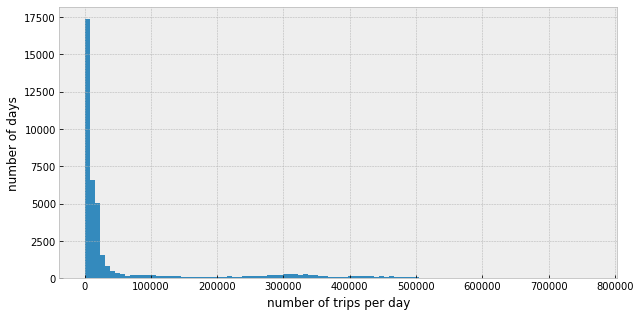

In [94]:
# -- determine range, mean, median, and std of trips
print("trips min    : {0}".format(taxis["trips"].min()))
print("trips max    : {0}".format(taxis["trips"].max()))
print("trips mean   : {0}".format(taxis["trips"].mean()))
print("trips median : {0}".format(taxis["trips"].median()))
print("")

# -- plot the histogram of all trips
fig, ax = plt.subplots(figsize=[10, 5])
hst     = ax.hist(taxis["trips"], bins=100)
xlab    = ax.set_xlabel("number of trips per day")
ylab    = ax.set_ylabel("number of days")

**Figure 1:** The distribution of the number of trips per day across all car types and the full range of dates in the data set.  The number of trips is strongly peaked at low values with several sub-dominant maxima at larger values.

In [95]:
# -- check unique values for categorical data
print("unique values of \"geo\"    : {0}" \
      .format(np.unique(taxis["geo"])))
print("")
print("unique values of \"car_type\"    : {0}" \
      .format(np.unique(taxis["car_type"])))
print("")
print("unique values of \"grouping\"    : {0}" \
      .format(np.unique(taxis["grouping"])))
print("")
print("unique values of \"parent_type\" : {0}" \
      .format(np.unique(taxis["parent_type"])))
print("")


# -- explore sub groupings
print("unique values of \"car_type\" for \"parent_type\"=Taxis : {0}" \
      .format(np.unique(taxis[taxis["parent_type"] == "Taxis"]["car_type"])))
print("")
print("unique values of \"car_type\" for \"parent_type\"=Ride-hailing apps : {0}" \
      .format(np.unique(taxis[taxis["parent_type"] == "Ride-hailing apps"]["car_type"])))
print("")
print("unique values of \"car_type\" for \"parent_type\"=Other : {0}" \
      .format(np.unique(taxis[taxis["parent_type"] == "Other"]["car_type"])))
print("")


# -- check a few groupings to ensure no cross-over
print("unique values of \"car_type\" for \"grouping\"=gett : {0}" \
      .format(np.unique(taxis[taxis["grouping"] == "gett"]["car_type"])))
print("")
print("unique values of \"car_type\" for \"grouping\"=green : {0}" \
      .format(np.unique(taxis[taxis["grouping"] == "green"]["car_type"])))
print("")
print("unique values of \"car_type\" for \"grouping\"=juno : {0}" \
      .format(np.unique(taxis[taxis["grouping"] == "juno"]["car_type"])))
print("")
print("unique values of \"car_type\" for \"grouping\"=uber_2014 : {0}" \
      .format(np.unique(taxis[taxis["grouping"] == "uber_2014"]["car_type"])))
print("")

unique values of "geo"    : ['airports' 'manhattan' 'manhattan_hub' 'outer_boroughs_ex_airports']

unique values of "car_type"    : ['Gett' 'Green taxis' 'Juno' 'Lyft' 'Non-app FHVs' 'Uber' 'Via'
 'Yellow taxis']

unique values of "grouping"    : ['gett' 'green' 'juno' 'lyft' 'other' 'uber' 'uber_2014' 'via' 'yellow']

unique values of "parent_type" : ['Other' 'Ride-hailing apps' 'Taxis']

unique values of "car_type" for "parent_type"=Taxis : ['Green taxis' 'Yellow taxis']

unique values of "car_type" for "parent_type"=Ride-hailing apps : ['Gett' 'Juno' 'Lyft' 'Uber' 'Via']

unique values of "car_type" for "parent_type"=Other : ['Non-app FHVs']

unique values of "car_type" for "grouping"=gett : ['Gett']

unique values of "car_type" for "grouping"=green : ['Green taxis']

unique values of "car_type" for "grouping"=juno : ['Juno']

unique values of "car_type" for "grouping"=uber_2014 : ['Uber']



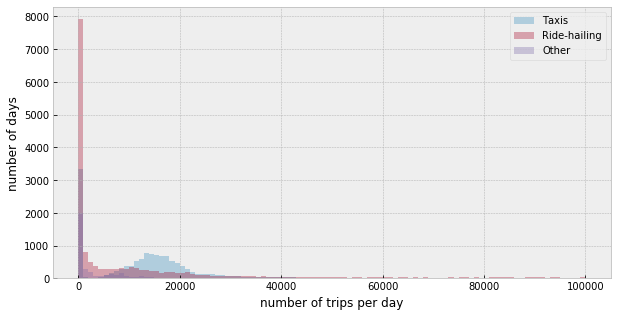

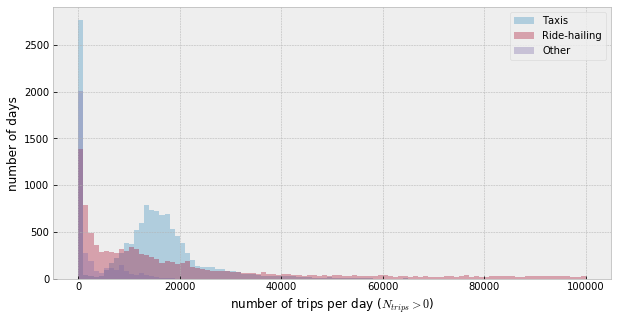

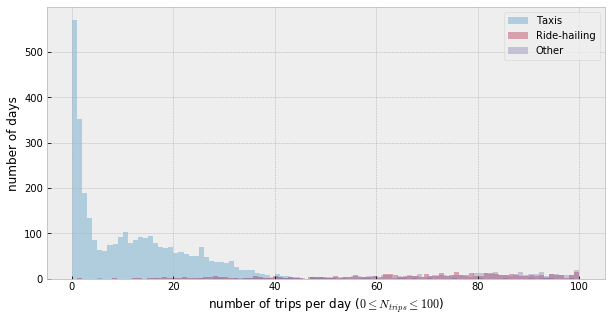

In [96]:
# -- view histogram for each parent type
gtype   = taxis["parent_type"]
fig, ax = plt.subplots(figsize=[10, 5])
taxis[gtype == "Taxis"].hist("trips", bins=100, range=[0, 100000], alpha=0.33, label="Taxis", ax=ax)
taxis[gtype == "Ride-hailing apps"].hist("trips", bins=100, range=[0, 100000], alpha=0.33, label="Ride-hailing", ax=ax)
taxis[gtype == "Other"].hist("trips", bins=100, range=[0, 100000], alpha=0.33, label="Other", ax=ax)
ax.set_title("")
ax.legend()
xlab    = ax.set_xlabel("number of trips per day")
ylab    = ax.set_ylabel("number of days")


# -- restrict to >0 trips per day
gtype   = taxis["parent_type"]
fig, ax = plt.subplots(figsize=[10, 5])
taxis[gtype == "Taxis"].hist("trips", bins=100, range=[1, 100000], alpha=0.33, label="Taxis", ax=ax)
taxis[gtype == "Ride-hailing apps"].hist("trips", bins=100, range=[1, 100000], alpha=0.33, label="Ride-hailing", ax=ax)
taxis[gtype == "Other"].hist("trips", bins=100, range=[1, 100000], alpha=0.33, label="Other", ax=ax)
ax.set_title("")
ax.legend()
xlab    = ax.set_xlabel("number of trips per day ($N_{trips} > 0$)")
ylab    = ax.set_ylabel("number of days")


# -- restrict to >0 trips per day
gtype   = taxis["parent_type"]
fig, ax = plt.subplots(figsize=[10, 5])
taxis[gtype == "Taxis"].hist("trips", bins=100, range=[0, 100], alpha=0.33, label="Taxis", ax=ax)
taxis[gtype == "Ride-hailing apps"].hist("trips", bins=100, range=[1, 100], alpha=0.33, label="Ride-hailing", ax=ax)
taxis[gtype == "Other"].hist("trips", bins=100, range=[0, 100], alpha=0.33, label="Other", ax=ax)
ax.set_title("")
ax.legend()
xlab    = ax.set_xlabel("number of trips per day ($0 \leq N_{trips} \leq 100$)")
ylab    = ax.set_ylabel("number of days")

**Figure 2:** The distribution of trips per day for all days (*top*), days with strictly greater than zero trips (*middle*), and for only days with between 0 and 100 trips (*bottom*).  The strong peak at 0 for taxis is due to the fact that Green taxis appear as zeros in the data set until 2013-08-01.  That said, taxis characteristically total around 175,000 trips per day.  There is no strong associated peak in the Ride-hailing distribution.

In [97]:
taxis[(taxis["car_type"] == "Green taxis") & (taxis["trips"] > 0)]["date"].min()

Timestamp('2013-08-01 00:00:00')

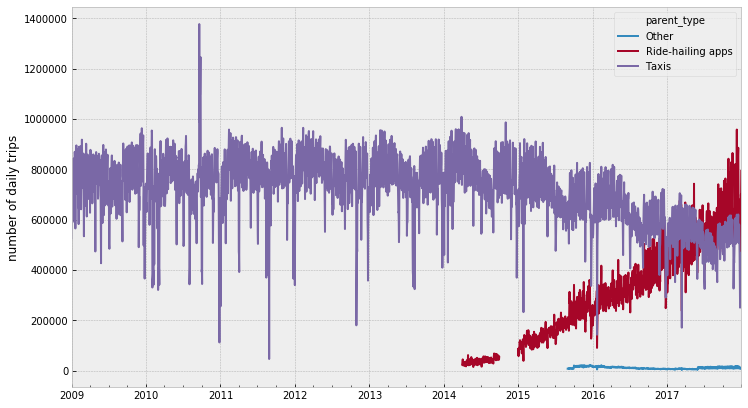

In [98]:
# -- plot each parent type vs time
fig, ax = plt.subplots(figsize=[12, 7])
taxis.groupby(["date", "parent_type"]).sum().unstack("parent_type").plot(y="trips", use_index=True, ax=ax)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips")

**Figure 3:** The number of daily trips over time for the three highest-level aggregations of ride-type.  There is a noticeable decline in taxi trips after 2015 coupled with a dramatic rise in Ride-hailing apps during the same time period.

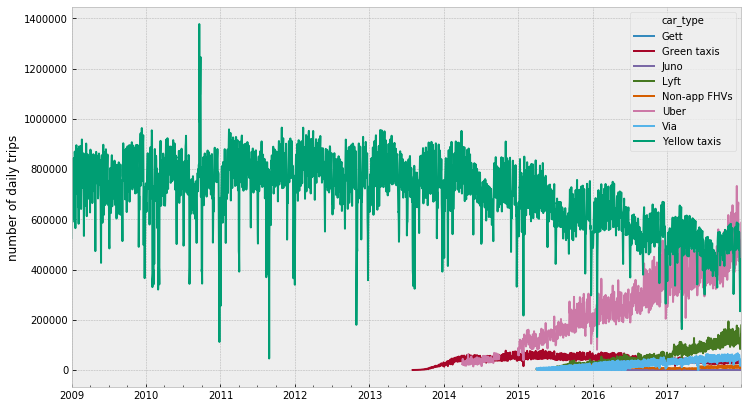

In [99]:
# -- plot each car type vs time
fig, ax = plt.subplots(figsize=[12, 7])
taxis.groupby(["date", "car_type"]).sum().unstack("car_type").plot(y="trips", use_index=True, ax=ax)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips")

**Figure 4:**  The same as Figure 3 except broken down by specific ride type.  For taxis, yellow cabs dominate over all time periods, while for ride-hailing, the trips are dominated by Uber.

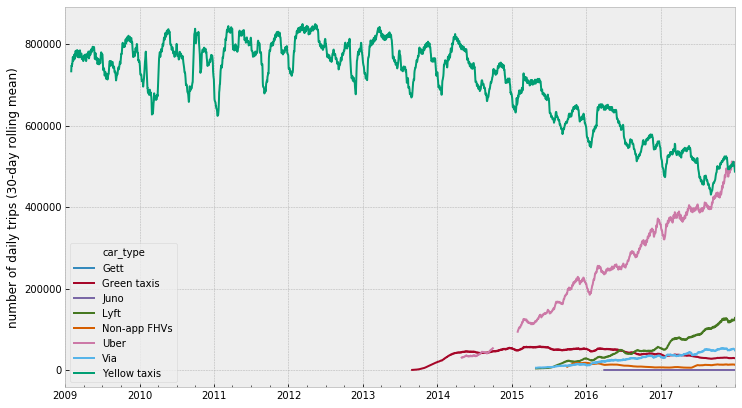

In [100]:
# -- plot each car type vs time with a rolling mean of 30 days
fig, ax = plt.subplots(figsize=[12, 7])
taxis.groupby(["date", "car_type"]).sum().unstack("car_type").rolling(30).mean().plot(y="trips", use_index=True, ax=ax)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips (30-day rolling mean)")

**Figure 5:** The same as Figure 4, but with a 30-day rolling mean applied.  There is clear structure in the time series of trips for various car types with annual periodicity in Yellow taxi trips.

In [0]:
# -- group by date and parent type for each geography
airports  = taxis[taxis["geo"] == "airports"].groupby(["date", "parent_type"]).sum().unstack("parent_type")
manhattan = taxis[taxis["geo"] == "manhattan"].groupby(["date", "parent_type"]).sum().unstack("parent_type")
mhub      = taxis[taxis["geo"] == "manhattan_hub"].groupby(["date", "parent_type"]).sum().unstack("parent_type")
outerboro = taxis[taxis["geo"] == "outer_boroughs_ex_airports"].groupby(["date", "parent_type"]).sum().unstack("parent_type")
taxis_tot = taxis[taxis["geo"] == "total"].groupby(["date", "parent_type"]).sum().unstack("parent_type")

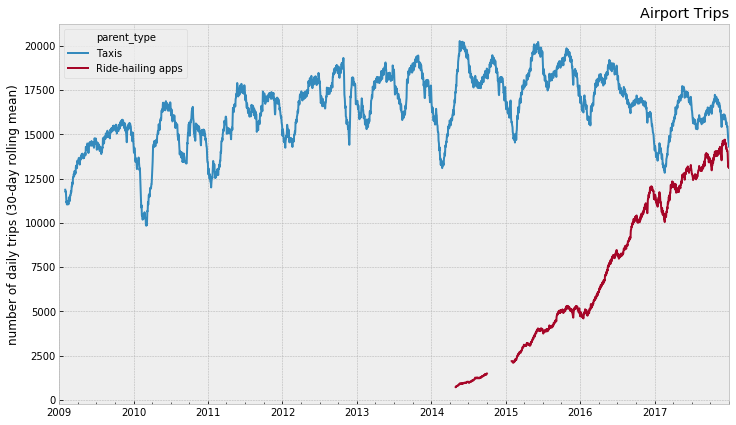

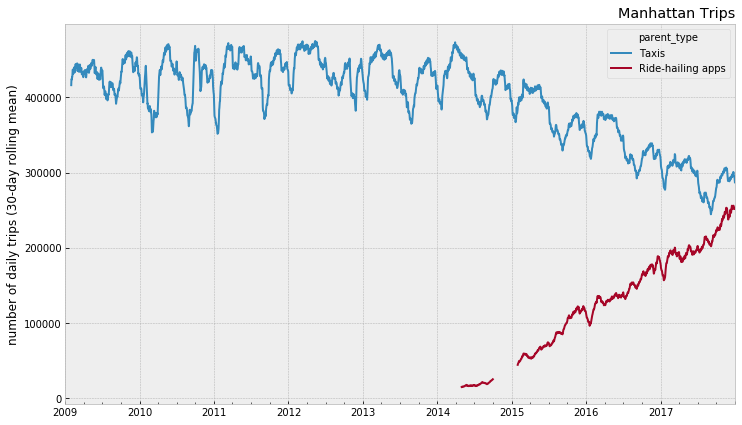

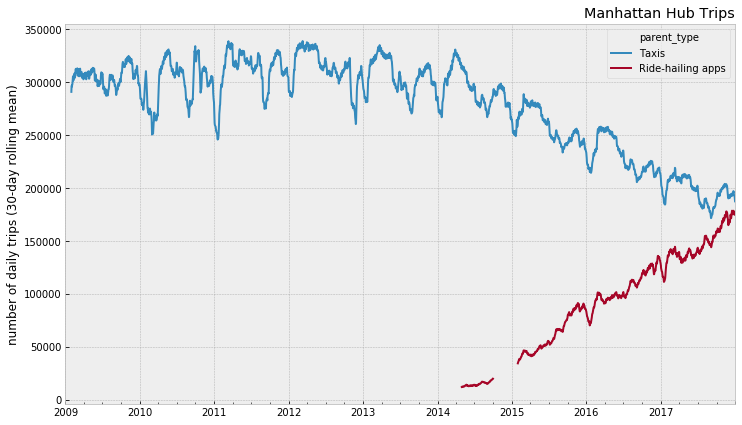

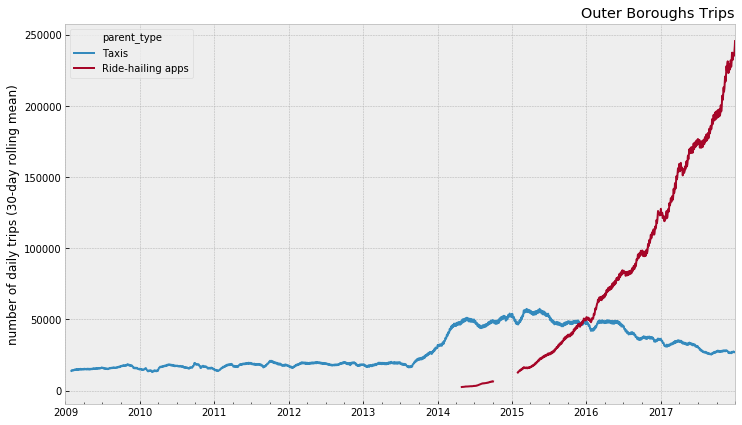

In [102]:
# -- compare geographies
fig, ax = plt.subplots(figsize=[12, 7])
airports["trips"].rolling(30).mean().plot(y=["Taxis", "Ride-hailing apps"], use_index=True, ax=ax)
ax.set_title("Airport Trips", loc="right")
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips (30-day rolling mean)")

fig, ax = plt.subplots(figsize=[12, 7])
manhattan["trips"].rolling(30).mean().plot(y=["Taxis", "Ride-hailing apps"], use_index=True, ax=ax)
ax.set_title("Manhattan Trips", loc="right")
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips (30-day rolling mean)")

fig, ax = plt.subplots(figsize=[12, 7])
mhub["trips"].rolling(30).mean().plot(y=["Taxis", "Ride-hailing apps"], use_index=True, ax=ax)
ax.set_title("Manhattan Hub Trips", loc="right")
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips (30-day rolling mean)")

fig, ax = plt.subplots(figsize=[12, 7])
outerboro["trips"].rolling(30).mean().plot(y=["Taxis", "Ride-hailing apps"], use_index=True, ax=ax)
ax.set_title("Outer Boroughs Trips", loc="right")
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of daily trips (30-day rolling mean)")



**Figure 6:** The 30-day rolling mean of trips for taxis and ride-hailing apps for various Airport, Manhattan, Manhattan Hub, and Outer Boroughs pickup locations (*top* to *bottom* respectively).  While there has been a decline in Taxis since 2015 with an accompanying rise in ride-hailing apps for all geographies, the outer boroughs saw a marked increased in taxi trips in 2014 while ride-hailing apps have clearly dominated since 2016.

---

### PART 3 – Analysis of Taxi/Ride-hailing Time Series Data **(10 points)**




As we did with time series data in class, we'd like to answer two fundamental questions:

<b>

1. what is the relationship between Taxis and Ride-hailing alternatives in NYC?

2. is there periodicity in the (various kinds of) trip data?

</b>

While we are asking these questions in a very different context, the purpose of these questions is same <small>(note the transferability of these tools across different domains)</small>.  Namely to assess the potential impact of one modality on another, and how might we anticipate resource allocation for demand.

**Using the time series analysis techniques we developed in class, present quantitative evidence with supporting visualizations that address the two questions above.**

In [0]:
# -- restrict our study period to those dates with complete ride-sharing data
taxis_sp = taxis[taxis["date"] >= "2015-01-01"]

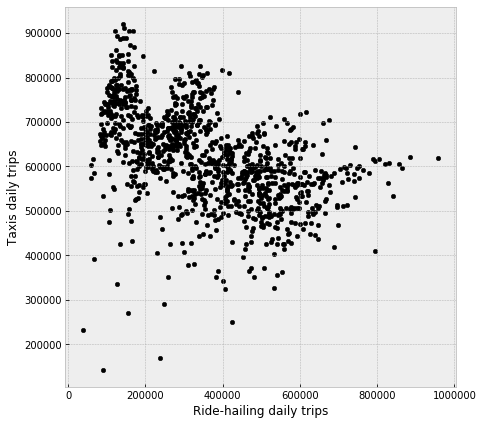

In [108]:
# -- scatter plot taxis vs ride-hailing for each date
taxis_spgp = taxis_sp.groupby(["date", "parent_type"]).sum().unstack("parent_type")

fig, ax = plt.subplots(figsize=[7, 7])
taxis_spgp["trips"].plot.scatter("Ride-hailing apps", "Taxis", color="black", ax=ax)
xlab = ax.set_xlabel("Ride-hailing daily trips")
ylab = ax.set_ylabel("Taxis daily trips")

**Figure 7:** Daily trip totals for Taxis vs Ride-hailing apps for dates after 2015-01-01.  There is a clear *anti*correlation between taxis and ride-hailing trips.

In [105]:
# -- print correlation coefficients
print("CORRELATION MATRIX:")
print("")
print(taxis_spgp["trips"].corr())

CORRELATION MATRIX:

parent_type           Other  Ride-hailing apps     Taxis
parent_type                                             
Other              1.000000          -0.180534  0.376014
Ride-hailing apps -0.180534           1.000000 -0.491798
Taxis              0.376014          -0.491798  1.000000


In [0]:
# -- remove trends
taxis_spgpm = taxis_spgp - taxis_spgp.rolling(30).mean()
taxis_spgpm.dropna(inplace=True)

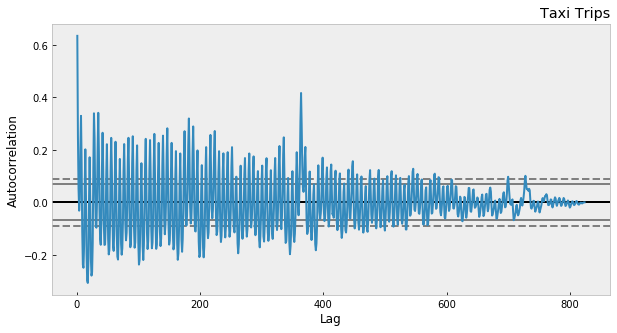

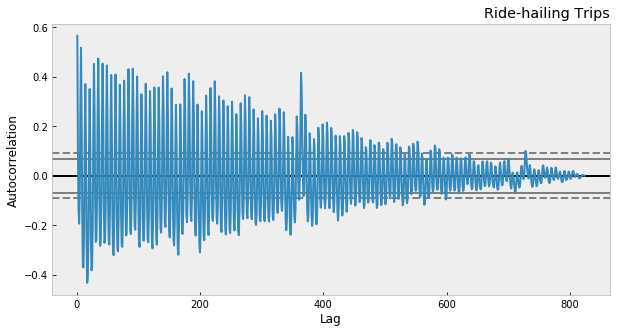

In [107]:
# -- generate auto-correlation function for Taxis and Ride-hailing
fig, ax = plt.subplots(figsize=[10, 5])
acf = pd.plotting.autocorrelation_plot(taxis_spgpm["trips"]["Taxis"], ax=ax)
tlab = ax.set_title("Taxi Trips", loc="right")

fig, ax = plt.subplots(figsize=[10, 5])
acf = pd.plotting.autocorrelation_plot(taxis_spgpm["trips"]["Ride-hailing apps"], ax=ax)
tlab = ax.set_title("Ride-hailing Trips", loc="right")

**Figure 8:** The auto-correlation function (ACF) for Taxis (*top*) and Ride-hailing apps (*bottom*).  While there is structure in the ACF on multiple time scales, there is a peak at 365 days indicating clear annual periodicity in the underlying time series of both car types.

---

### PART 4 – Summary of Findings **(10 points)**




**Summarize (no more than 500 words) your findings in this notebook by briefly reviewing the summary of the data set that you developed in Part 2 and provide answers to the two questions in Part 3 using the quantitative metrics and visualizations that you found as evidence to support your claims.  As always, include a description of limitations and potential biases in your analysis.**

TEXT FOR YOUR ANSWER HERE.

#### EXTRA CREDIT – Generalizability of results.


**Repeat Part 3 above for the city of Chicago.  The (non-aggregated) taxi trip data can be found [here](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew) and the TNP (Transportation Network Providers) data can be found [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p).**

